# Micro Credit Project

    Our client is collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
    Hence the objective is to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of issuance of loan. In this case, Label ‘1’ indicates that the loan has been paid i.e., Non- defaulter, while, Label ‘0’ indicates that the loan has not been paid i.e., defaulter.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data file.csv')
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

## Features Description

    1. label:	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
    2. msisdn:	mobile number of user
    3. aon:	age on cellular network in days
    4. daily_decr30:	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
    5. daily_decr90:	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
    6. rental30:	Average main account balance over last 30 days
    7. rental90:	Average main account balance over last 90 days
    8. last_rech_date_ma:	Number of days till last recharge of main account
    9. last_rech_date_da:	Number of days till last recharge of data account
    10. last_rech_amt_ma:	Amount of last recharge of main account (in Indonesian Rupiah)
    11. cnt_ma_rech30:	Number of times main account got recharged in last 30 days
    12. fr_ma_rech30:	Frequency of main account recharged in last 30 days
    13. sumamnt_ma_rech30:	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
    14. medianamnt_ma_rech30:	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
    15. medianmarechprebal30:	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
    16. cnt_ma_rech90:	Number of times main account got recharged in last 90 days
    17. fr_ma_rech90:	Frequency of main account recharged in last 90 days
    18. sumamnt_ma_rech90:	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
    19. medianamnt_ma_rech90:	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
    20. medianmarechprebal90:	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
    21. cnt_da_rech30:	Number of times data account got recharged in last 30 days
    22. fr_da_rech30:	Frequency of data account recharged in last 30 days
    23. cnt_da_rech90:	Number of times data account got recharged in last 90 days
    24. fr_da_rech90:	Frequency of data account recharged in last 90 days
    25. cnt_loans30:	Number of loans taken by user in last 30 days
    26. amnt_loans30:	Total amount of loans taken by user in last 30 days
    27. maxamnt_loans30:	maximum amount of loan taken by the user in last 30 days
    28. medianamnt_loans30:	Median of amounts of loan taken by the user in last 30 days
    29. cnt_loans90:	Number of loans taken by user in last 90 days
    30. amnt_loans90:	Total amount of loans taken by user in last 90 days
    31. maxamnt_loans90:	maximum amount of loan taken by the user in last 90 days
    32. medianamnt_loans90:	Median of amounts of loan taken by the user in last 90 days
    33. payback30:	Average payback time in days over last 30 days
    34. payback90:	Average payback time in days over last 90 days
    35. pcircle:	telecom circle
    36. pdate:	date

# EDA

In [3]:
df.shape

(209593, 37)

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

    Observations:
        Columns/Features such as msisdn, pcircle, pdate are in 'object' Data-Types.
        Rest of the features are in 'int' and 'float' Data-Types.

In [6]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

    Observations:
        No missing values in the dataset.

In [7]:
# checking any duplicate data
df.duplicated().sum()

0

## Univariate Analysis

In [8]:
df['label'].unique()

array([0, 1], dtype=int64)

### Observations:
        Label '1' indicates that the loan has been paid i.e. Non-Defaulter.
        Label '0' indicates that the loan has not been paid i.e. Defaulter.

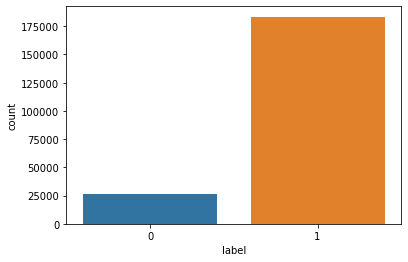

In [9]:
sns.countplot(df['label'])
plt.show()

### Observations:
        Label '1' has approximately 87.5% of records, while, label '0' has approximately 12.5% of records.

In [10]:
df[['daily_decr30','daily_decr90']].describe()

daily_decr30   daily_decr90
count  209593.000000  209593.000000
mean     5381.402289    6082.515068
std      9220.623400   10918.812767
min       -93.012667     -93.012667
25%        42.440000      42.692000
50%      1469.175667    1500.000000
75%      7244.000000    7802.790000
max    265926.000000  320630.000000

### Observations:
        - Customer's average daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) is 5381.40.
        - 75th Percentile = 7244.00 i.e., 75 % of Customers daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) is less than or equal to 7244.00
        - Customer's average daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) is 6082.51
        - 75th Percentile = 7802.79 i.e., 75 % of Customers daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) is less than or equal to 7802.79

In [11]:
df[['rental30','rental90']].describe()

rental30       rental90
count  209593.000000  209593.000000
mean     2692.581910    3483.406534
std      4308.586781    5770.461279
min    -23737.140000  -24720.580000
25%       280.420000     300.260000
50%      1083.570000    1334.000000
75%      3356.940000    4201.790000
max    198926.110000  200148.110000

### Observations:
        - Customer's average main account balance over last 30 days(in Indonesian Rupiah) is 2692.58
        - 75th Percentile = 3356.94 i.e., 75 % of Customers average main account balance over last 30 days (in Indonesian Rupiah) is less than or equal to 3356.94
        - Customer's average main account balance over last 90 days(in Indonesian Rupiah) is 3483.40
        - 75th Percentile = 4201.79 i.e., 75 % of Customers average main account balance over last 90 days (in Indonesian Rupiah) is less than or equal to 4201.79

In [12]:
df[['last_rech_date_ma','last_rech_date_da']].describe()

last_rech_date_ma  last_rech_date_da
count      209593.000000      209593.000000
mean         3755.847800        3712.202921
std         53905.892230       53374.833430
min           -29.000000         -29.000000
25%             1.000000           0.000000
50%             3.000000           0.000000
75%             7.000000           0.000000
max        998650.377733      999171.809410

### Observations:
        - 75th Percentile = 7.00 i.e., 75 % of Customers number of days till last recharge of main account is within 7 days.
        - 75th Percentile = 0.00 i.e., 75 % of Customers recharge their data account immediately once plan is expired.

In [13]:
df['last_rech_amt_ma'].describe()

count    209593.000000
mean       2064.452797
std        2370.786034
min           0.000000
25%         770.000000
50%        1539.000000
75%        2309.000000
max       55000.000000
Name: last_rech_amt_ma, dtype: float64

### Observations:
        Customers last recharge average amount to their main account (in Indonesian Rupiah) is 2064.45

In [14]:
df[['cnt_ma_rech30','cnt_ma_rech90']].describe()

cnt_ma_rech30  cnt_ma_rech90
count  209593.000000   209593.00000
mean        3.978057        6.31543
std         4.256090        7.19347
min         0.000000        0.00000
25%         1.000000        2.00000
50%         3.000000        4.00000
75%         5.000000        8.00000
max       203.000000      336.00000

### Observations:
        - Customers recharge their main account on average 4 times in last 30 days.
        - Majority of customers recharge their main account on average 6 to 8 times in last 90 days.

In [15]:
df[['sumamnt_ma_rech30','sumamnt_ma_rech90']].describe()

sumamnt_ma_rech30  sumamnt_ma_rech90
count      209593.000000      209593.000000
mean         7704.501157       12396.218352
std         10139.621714       16857.793882
min             0.000000           0.000000
25%          1540.000000        2317.000000
50%          4628.000000        7226.000000
75%         10010.000000       16000.000000
max        810096.000000      953036.000000

### Observations:
        - On average customers total amount of recharge to their main account over last 30 days (in Indonesian Rupiah) is 7704.50
        - On average customers total amount of recharge to their main account over last 90 days (in Indonesian Rupiah) is 12396.21

In [16]:
df[['medianamnt_ma_rech30','medianamnt_ma_rech90']].describe()

medianamnt_ma_rech30  medianamnt_ma_rech90
count         209593.000000         209593.000000
mean            1812.817952           1864.595821
std             2070.864620           2081.680664
min                0.000000              0.000000
25%              770.000000            773.000000
50%             1539.000000           1539.000000
75%             1924.000000           1924.000000
max            55000.000000          55000.000000

### Observations:
        - On average median of total amount of recharges done to main account over last 30 days at user level (in Indonesian Rupiah) is 1812.81
        - On average median of total amount of recharges done to main account over last 90 days at user level (in Indonesian Rupiah) is 1864.59

In [17]:
df[['medianmarechprebal30','medianmarechprebal90']].describe()

medianmarechprebal30  medianmarechprebal90
count         209593.000000         209593.000000
mean            3851.927942             92.025541
std            54006.374433            369.215658
min             -200.000000           -200.000000
25%               11.000000             14.600000
50%               33.900000             36.000000
75%               83.000000             79.310000
max           999479.419319          41456.500000

### Observations:
        - 75 % of customers median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) is less than or equal to 83.00
        - On average customers median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah) is 92.02

In [18]:
df[['cnt_loans30','cnt_loans90']].describe()

cnt_loans30    cnt_loans90
count  209593.000000  209593.000000
mean        2.758981      18.520919
std         2.554502     224.797423
min         0.000000       0.000000
25%         1.000000       1.000000
50%         2.000000       2.000000
75%         4.000000       5.000000
max        50.000000    4997.517944

### Observations:
        - Total number of loans taken by majority of users in last 30 days is 2 to 4.
        - Number of loans taken by 75 % of users in last 90 days is less than or equal to 5.

In [19]:
df[['amnt_loans30','amnt_loans90']].describe()

amnt_loans30   amnt_loans90
count  209593.000000  209593.000000
mean       17.952021      23.645398
std        17.379741      26.469861
min         0.000000       0.000000
25%         6.000000       6.000000
50%        12.000000      12.000000
75%        24.000000      30.000000
max       306.000000     438.000000

### Observations:
        - On average the total loan amount taken by users in last 30 days is 17.95
        - On average the total loan amount taken by users in last 90 days is 23.64

In [20]:
df['maxamnt_loans30']

0          6.0
1         12.0
2          6.0
3          6.0
4          6.0
          ... 
209588     6.0
209589     6.0
209590    12.0
209591    12.0
209592    12.0
Name: maxamnt_loans30, Length: 209593, dtype: float64

### Observations:
        There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively.

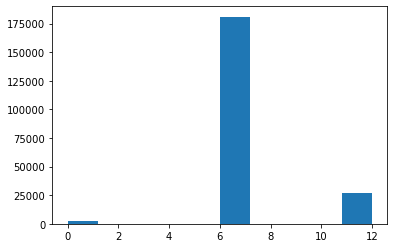

In [21]:
plt.hist(df['maxamnt_loans90'])
plt.show()

### Observations:
        There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively and 0 represent no loan has been taken by the user.

In [22]:
df[['payback30','payback90']].describe()

payback30      payback90
count  209593.000000  209593.000000
mean        3.398826       4.321485
std         8.813729      10.308108
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       1.666667
75%         3.750000       4.500000
max       171.500000     171.500000

### Observations:
        - Average payback time in days over last 30 days is 3 days.
        - Average payback time in days over last 90 days is 4 days.

## Bivariate Analysis

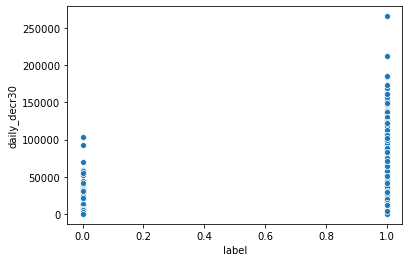

In [23]:
sns.scatterplot(df['label'],df['daily_decr30'])
plt.show()

### Observations:
        If customers daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) is less, then there is high chance that those customers may default on payments.

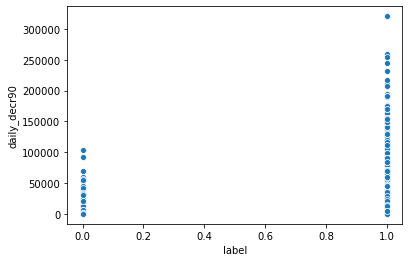

In [24]:
sns.scatterplot(df['label'],df['daily_decr90'])
plt.show()

### Observations:
        If customers daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) is less, then there is high chance that those customers may default on payments.

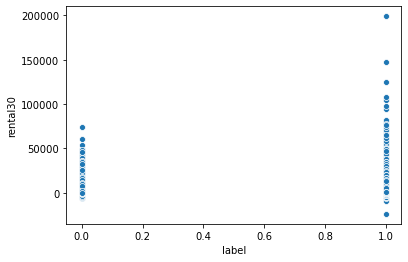

In [25]:
sns.scatterplot(df['label'],df['rental30'])
plt.show()

### Observations:
        If customers average main account balance over last 30 days (in Indonesian Rupiah) is less, then there is high chance that those customers may default on payments.

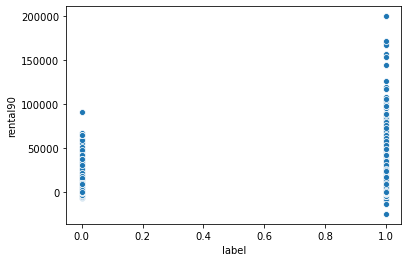

In [26]:
sns.scatterplot(df['label'],df['rental90'])
plt.show()

### Observations:
        If customers average main account balance over last 90 days (in Indonesian Rupiah) is less, then there is high chance that those customers may default on payments.

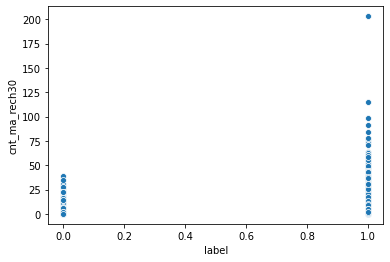

In [27]:
sns.scatterplot(df['label'],df['cnt_ma_rech30'])
plt.show()

### Observations:
        If the number of times main account got recharged in last 30 days of users is less, then there is high chance that those customers may default on payments.

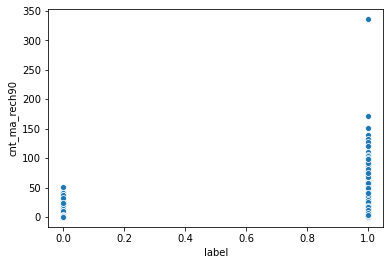

In [28]:
sns.scatterplot(df['label'],df['cnt_ma_rech90'])
plt.show()

### Observations:
        If the number of times main account got recharged in last 90 days of users is less, then there is high chance that those customers may default on payments.

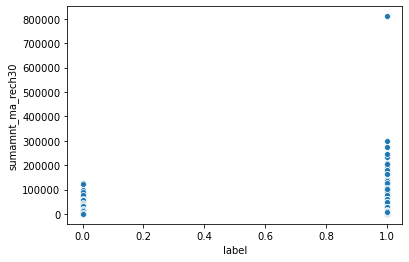

In [29]:
sns.scatterplot(df['label'],df['sumamnt_ma_rech30'])
plt.show()

### Observations:
        If customers total amount of recharge to their main account over last 30 days (in Indonesian Rupiah) is less, then there is high chance that those customers may default on payments.

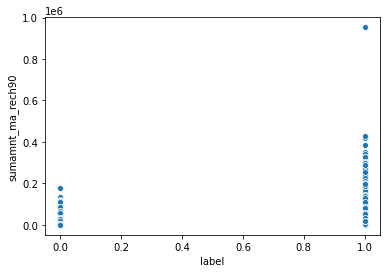

In [30]:
sns.scatterplot(df['label'],df['sumamnt_ma_rech90'])
plt.show()

### Observations:
        If customers total amount of recharge to their main account over last 90 days (in Indonesian Rupiah) is less, then there is high chance that those customers may default on payments.

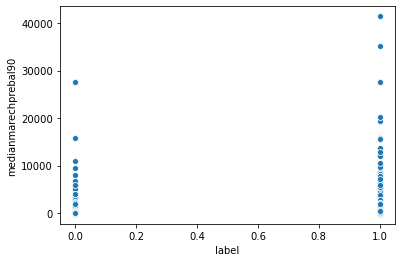

In [31]:
sns.scatterplot(df['label'],df['medianmarechprebal90'])
plt.show()

### Observations:
        If customers median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah) is less, then there is high chance that those customers may default on payments.

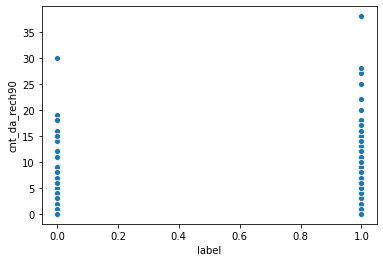

In [32]:
sns.scatterplot(df['label'],df['cnt_da_rech90'])
plt.show()

### Observations:
        If the number of times data account got recharged in last 90 days of users is less, then there is high chance that those customers may default on payments.

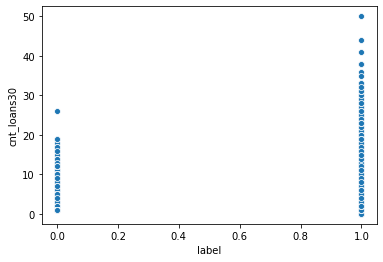

In [33]:
sns.scatterplot(df['label'],df['cnt_loans30'])
plt.show()

### Observations:
        If number of loans taken by user in last 30 days is less, then there is high chance that those customers may default on payments.

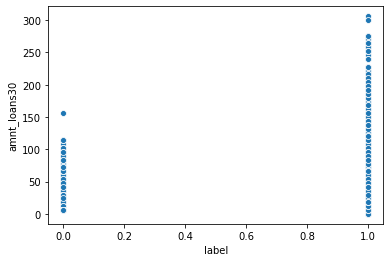

In [34]:
sns.scatterplot(df['label'],df['amnt_loans30'])
plt.show()

### Observations:
        If total amount of loans taken by user in last 30 days is less, then there is high chance that those customers may default on payments.

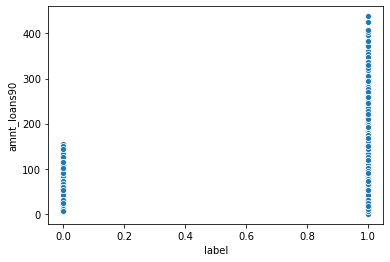

In [35]:
sns.scatterplot(df['label'],df['amnt_loans90'])
plt.show()

### Observations:
        If total amount of loans taken by user in last 90 days is less, then there is high chance that those customers may default on payments.

# Data Cleaning

In [36]:
# unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [37]:
df['msisdn']

0         21408I70789
1         76462I70374
2         17943I70372
3         55773I70781
4         03813I82730
             ...     
209588    22758I85348
209589    95583I84455
209590    28556I85350
209591    59712I82733
209592    65061I85339
Name: msisdn, Length: 209593, dtype: object

### Observations:
        This column gives us the mobile number of users.
        This column is not required to predict label, hence we can drop this column.

In [38]:
df.drop('msisdn',axis=1,inplace=True)

In [39]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

### Observations:
        This feature gives us only one information, hence it is not necessary to feed this information to models, therefore we can drop this column.

In [40]:
df.drop('pcircle',axis=1,inplace=True)

In [41]:
pd.to_datetime(df['pdate'],format='%Y-%m-%d').dt.year.unique()

array([2016], dtype=int64)

### Observations:
        The data is from the year 2016, This information is not needed to predict label, hence we can drop this column.

In [42]:
df.drop('pdate',axis=1,inplace=True)

In [43]:
df['maxamnt_loans90'].unique()

array([ 6, 12,  0], dtype=int64)

In [44]:
df['maxamnt_loans30'].unique()

array([6.00000000e+00, 1.20000000e+01, 0.00000000e+00, ...,
       9.28645017e+04, 5.42592657e+04, 9.69272433e+04])

### Observations:
        According to Features description, this column should contain only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively and 0 represent no loan has been taken by the user.
        But in this column there are multiple values, hence lets keep 0, 6, 12 as it is and convert all other values into 0. 

In [45]:
val = []

for num in df['maxamnt_loans30']:
    if num == 6:
        val.append(6)
    elif num == 12:
        val.append(12)
    else:
        val.append(0)

In [46]:
df['maxamnt_loans30']=val

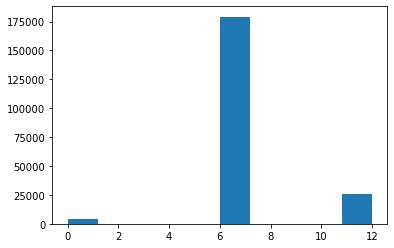

In [47]:
plt.hist(df['maxamnt_loans30'])
plt.show()

# Data Pre-processing

## Checking Outliers

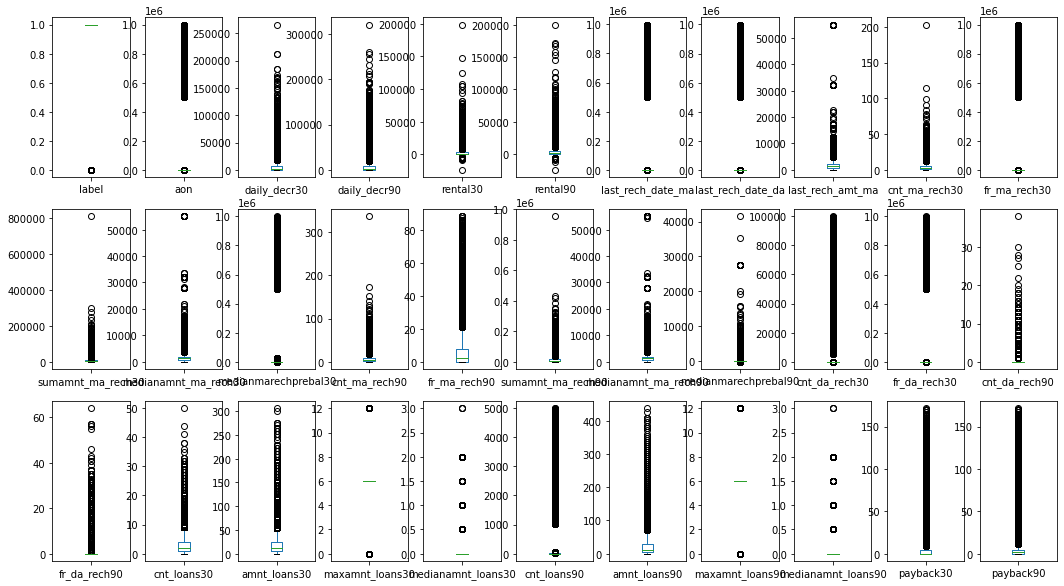

In [48]:
df.plot(kind='box',subplots=True,layout=(3,11),figsize=(18,10))
plt.show()

### Observations:
        From above boxplots it is evident that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [49]:
from scipy.stats import zscore
z=zscore(df)

In [50]:
# Threshold = 5
mc = df[(z<5).all(axis=1)]

In [51]:
print(df.shape,'\t\t',mc.shape)

(209593, 33) 		 (191310, 33)


In [52]:
# percentage loss of data
per_loss=((209593-191310)/209593)*100
per_loss

8.723096668304763

    Since acceptable percentage loss of data is 7 to 8 %, we can go ahead.

## Checking Skewness

In [53]:
mc.skew()

label                   -2.241174
aon                      0.949203
daily_decr30             2.286808
daily_decr90             2.422535
rental30                 2.478328
rental90                 2.608537
last_rech_date_ma        3.091777
last_rech_date_da        9.986788
last_rech_amt_ma         2.218296
cnt_ma_rech30            1.653986
fr_ma_rech30             2.005416
sumamnt_ma_rech30        2.070705
medianamnt_ma_rech30     2.441393
medianmarechprebal30    10.697861
cnt_ma_rech90            1.799091
fr_ma_rech90             2.176209
sumamnt_ma_rech90        2.163134
medianamnt_ma_rech90     2.459234
medianmarechprebal90     4.845627
cnt_da_rech30           37.548549
fr_da_rech30            93.722398
cnt_da_rech90            7.437793
fr_da_rech90            73.987467
cnt_loans30              1.873163
amnt_loans30             1.886475
maxamnt_loans30          1.287709
medianamnt_loans30       4.072558
cnt_loans90             71.721110
amnt_loans90             2.125285
maxamnt_loans9

### Observations:
       Acceptable range of skewness is +/- 0.5, since some of features/attributes skewness value exceeds the acceptable range we can conclude that our data is skewed.

## Splitting Data

In [54]:
x = mc.drop(['label'],axis=1)
y = mc['label']

## Removing Skewness

In [55]:
from sklearn.preprocessing import power_transform

x = power_transform(x, method='yeo-johnson')

## Standardizing Data

In [56]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x = sc.fit_transform(x)

# Model Training And Testing

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
mod_list=[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),
          AdaBoostClassifier(),GradientBoostingClassifier(),SGDClassifier()]

In [59]:
# finding the best random_state

acc=0
for i in range(40,80):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    if mod_acc>acc:
        acc=mod_acc
        best_random_state=i
        
print(f" Best Accuracy score is {acc*100} which is found on random_state {best_random_state}")

 Best Accuracy score is 88.51300493434809 which is found on random_state 62


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=best_random_state)

In [61]:
# finding the best cv

cv=0
for i in range(2,10):
    cv_score=cross_val_score(mod,x,y,cv=i).mean()
    if cv_score>cv:
        cv=cv_score
        best_cv=i
        
print(f" Best Cross_val_score is {cv*100} which is found on cv = {best_cv}")

 Best Cross_val_score is 88.32836800785357 which is found on cv = 9


# Finding The Best Model

In [62]:
for mod in mod_list:
    print(mod)
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy score:',mod_acc*100)
    print('Training score:',mod.score(x_train,y_train)*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('*****************************************************************************************')

LogisticRegression()
Accuracy score: 88.51300493434809
Training score: 88.32954656333199
[[ 1218  4825]
 [  669 41116]]
              precision    recall  f1-score   support

           0       0.65      0.20      0.31      6043
           1       0.89      0.98      0.94     41785

    accuracy                           0.89     47828
   macro avg       0.77      0.59      0.62     47828
weighted avg       0.86      0.89      0.86     47828

*****************************************************************************************
DecisionTreeClassifier()
Accuracy score: 86.56226478213598
Training score: 99.96515242330048
[[ 3046  2997]
 [ 3430 38355]]
              precision    recall  f1-score   support

           0       0.47      0.50      0.49      6043
           1       0.93      0.92      0.92     41785

    accuracy                           0.87     47828
   macro avg       0.70      0.71      0.70     47828
weighted avg       0.87      0.87      0.87     47828

************

### Observations:
        From above it is evident that Random Forest Classifier model is performing better with an accuracy score of 90% to 92%.

In [63]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
print('Training score:',rfc.score(x_train,y_train)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 91.30843857154804
Training score: 99.9630615686985
[[ 2722  3321]
 [  836 40949]]
              precision    recall  f1-score   support

           0       0.77      0.45      0.57      6043
           1       0.92      0.98      0.95     41785

    accuracy                           0.91     47828
   macro avg       0.85      0.72      0.76     47828
weighted avg       0.90      0.91      0.90     47828



In [64]:
cv_score=cross_val_score(rfc,x,y,cv=best_cv).mean()
print('Cross_val_score:',cv_score*100)

Cross_val_score: 91.22680469925949


### Let's perform hyper-parameter tuning of Random Forest Classifier model. 

## Hyper-parameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

parameter1 = {
    'criterion':['gini','entropy']    
}

In [66]:
gscv1 = GridSearchCV(rfc,parameter1,scoring='accuracy')
gscv1.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [67]:
parameter2 = {
    'max_features':['auto','sqrt','log2']
}

In [68]:
gscv2 = GridSearchCV(rfc,parameter2,scoring='accuracy')
gscv2.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [69]:
parameter3 = {
    'oob_score':[True,False]
}

In [70]:
gscv3 = GridSearchCV(rfc,parameter3,scoring='accuracy')
gscv3.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'oob_score': [True, False]}, scoring='accuracy')

In [71]:
parameter4 = {
    'warm_start':[True,False]
}

In [72]:
gscv4 = GridSearchCV(rfc,parameter4,scoring='accuracy')
gscv4.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'warm_start': [True, False]}, scoring='accuracy')

In [73]:
print(gscv1.best_params_,
      gscv2.best_params_,
      gscv3.best_params_,
      gscv4.best_params_)

{'criterion': 'gini'} {'max_features': 'sqrt'} {'oob_score': True} {'warm_start': True}


In [74]:
rfc=RandomForestClassifier(criterion='gini',max_features='sqrt',oob_score=True,warm_start=True)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
print('Training score:',rfc.score(x_train,y_train)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 91.3188926988375
Training score: 99.9637585202325
[[ 2724  3319]
 [  833 40952]]
              precision    recall  f1-score   support

           0       0.77      0.45      0.57      6043
           1       0.93      0.98      0.95     41785

    accuracy                           0.91     47828
   macro avg       0.85      0.72      0.76     47828
weighted avg       0.90      0.91      0.90     47828



# Roc Curve And Roc_Auc Score

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

In [76]:
y_pred_proba = rfc.predict_proba(x_test)[:,1]

In [77]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)

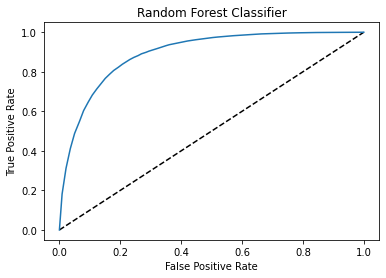

In [78]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [79]:
ra_score = roc_auc_score(y_test,y_pred)
ra_score*100

71.54170509220634

# Conclusion

In [80]:
df2 = pd.DataFrame({'label':y_test,'Predicted label':y_pred})
df2

label  Predicted label
57688       1                1
156915      1                1
127896      1                1
142988      1                1
92365       1                0
...       ...              ...
82771       1                1
202375      1                1
64462       1                1
177389      1                1
116667      1                1

[47828 rows x 2 columns]

### From the above table it is evident that model is performing better.

In [2]:
import joblib

In [82]:
# saving the best model for production
joblib.dump(rfc,'Micro_Credit_Defaulter_Model.obj')

['Micro_Credit_Defaulter_Model.obj']